# Preprocessing et visualisation univariée

In [1]:
# pip install missingno
# pip install squarify
# pip install bs4
# pip install pip install WordCloud
# pip install plotly
# pip install pycountry_convert
# pip install langdetect
# pip install nltk

#Package manipulation bases de données
import pandas as pd
import numpy as np

#Package visualisation
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#Package de traitement des variables
import missingno as msno

#Package pour le scrapping
import urllib
import bs4
from urllib import request
import html5lib
import zipfile

#Package analyse textuelle
from wordcloud import WordCloud
from langdetect import detect
import nltk
nltk.download('punkt')

#Package reconnaissance des pays
import pycountry_convert as pc

#Importation database colab
#from google.colab import drive
#drive.mount('/content/drive')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Dans l'optique de rendre notre travail dynamique, nous avons procéder de deux différentes façon à savoir :

**1 - Télécharger les données de la source à notre ordinateur :** Cette étape présente un inconvénient majeur en terme de temps d'éxécution. Son principal avantage est de rendre automitique l'opération de téléchargement et de dezippage de la base de donnée. En outre elle permet également de rendre dynamique le travail dans la mesure où elle permettra quelque soit l'utilisateur d'avoir la dernière version base donnée de la structure Kiva disponible en ligne. Son procédé est le suivant : scrappé la page web contenant le lien de téléchargement de la base donnée. Par suite étant donné que la base est dans un format zip, nous recourrons aux outils de python pour dézippé la base.

**2 - Utiliser la la base de donnée de donnée de kiva au 20/10/2020** disponible en dépôt partagé sur drive. Cette méthode est reputée être très rapide et c'est elle qui sera utilisée dans le cadre de cette présentation.

In [ ]:
def importation():
    '''Cette fonction, grâce des techniques de webscrapping et zipfile, permet de télécharger la base directement
        à sur le site de la structure KIVA'''
    
    source = requests.get('https://www.kiva.org/build/data-snapshots').text #Récupération de l'adresse
    soup = BeautifulSoup(source, 'lxml')
    #print(source)
    page = soup.find('div', class_ = 'row page-content') #Scrapping de la page pour rechercher l'élt row page-content dans le div
    #print(json_link.prettify())
    link = []
    
    for i in page.find_all('a'):
        ''' Permet de parcourir l'ensemble des éléments '''
        link.append(i['href'])
    link[1]
    #A ce niveau, nous avons le lien de notre data qui est zippé
    
    csv_link = requests.get(link[1])
    
    if(os.path.exists('dataloa')):  #Test si le dossier existe en local autrement le code a déjà été exécuté
        with open('data.zip','wb') as f:
            f.write(csv_link.content)
        #Extraction
        loan = zipfile.ZipFile('data.zip')
        loan.extractall('data_loan')
        loan.close()
        
        return('data_loan/loans.csv')
    else:                         # Dans ce cas, le dossier existe déjà en local
        nombre_execution += 1     # Va permettre de créer les dossiers en local avec les noms incrémentés
        data = 'data.zip' + str(nombre_execution)
        data_loan = 'data_loan' + str(nombre_execution)
        with open(data,'wb') as f:
            f.write(csv_link.content)
        #Extraction
        loan = zipfile.ZipFile(data)
        loan.extractall(data_loan)
        loan.close()
        
        return(data_loan+'/loans.csv')
# A la fin de cette fonction, notre base de donnée data_new est en dépôt local nous pouvons directement l'utiliser avec pd.read_csv

In [ ]:
# Exécution de la fonction
# loan = pd.read_csv(importation())

In [ ]:
#Alternative avec googlecolab
#loan = pd.read_csv('/content/drive/My Drive/Stat_App/loans.csv', encoding ='ISO-8859-1',  sep=";")

In [2]:
loan = pd.read_csv('loans.csv')

In [3]:
loan.shape

(1968819, 34)

Notre base de donnée est constituée de `1 968 819 observations` et `34 variables`. Par suite, nous procèderons à la description des différentes variables de la base.

 **Description des variables de la base de données**
 
* 1 - Loan ID : Identifiant de la transaction
* 2 - LOAN_NAME : Nom du prêt
* 3 -	ORIGINAL_LANGUAGE : Langue parlée
* 4 -	DESCRIPTION : Le champ de description a différentes sous-catégories
* 5 -	DESCRIPTION_TRANSLATED : Description textuelle du projet en anglais, espagnol, français ou russe
* 6 -	FUNDED_AMOUNT : Montant du prêt acheté par les prêteurs Kiva
* 7 -	LOAN_AMOUNT : Montant du prêt qui a été remboursé
* 8 -	STATUS : Status du prêt
* 9 -	IMAGE_ID : Image de l'emprunteur
* 10 - VIDEO_ID : Vidéo dans les proﬁls de prêt et les écritures de journal
* 11 - ACTIVITY_NAME : Activité qui sera réalisée avec le montant financé
* 12 - SECTOR_NAME : Secteur industriel auquel appartient l'activité
* 13 - LOAN_USE : Brève description textuelle de l'utilisation qui sera faite du capital financé
* 14 - COUNTRY_CODE : Code à 2 lettres du pays d'origine de l'emprunteur
* 15 - COUNTRY_NAME : Nom du pays de l'emprunteur
* 16 - TOWN_NAME : Ville du pays de l'emprunteur
* 17 - CURRENCY_POLICY : politique de change
* 18 - CURRENCY_EXCHANGE_COVERAGE_RATE : Taux de couverture de change
* 19 - CURRENCY : Monnaie
* 20 - PARTNER_ID : ID du partenaire de terrain
* 21 - POSTED_TIME : Date à laquelle le prêt a été comptabilisé
* 22 - PLANNED_EXPIRATION_TIME : L'heure à laquelle le prêt est prévu d'expirer
* 23 - DISBURSE_TIME : L'heure à laquelle les fonds du prêt ont été remis aux emprunteurs
* 24 - RAISED_TIME : Le temps d'échéance augmenté 
* 25 - LENDER_TERM : Durée fixée pour le prêteur du prêt
* 26 - NUM_LENDERS_TOTAL : Nombre total de prêteur
* 27 - NUM_JOURNAL_ENTRIES : Le nombre total d'écritures de journal pour le prêt
* 28 - NUM_BULK_ENTRIES : Le nombre total d'entrées automatisées ou «groupées»
* 29 - TAGS : Commentaire de l'opération
* 30 - BORROWER_NAMES : nom de l'emprunteur
* 31 - BORROWER_GENDERS : Genre de de l'emprunteur
* 32 - BORROWER_PICTURED : L'emprunteur a-t-il fourni ou non une photo?
* 33 - REPAYMENT_INTERVAL : Durée fixée pour le remboursement du prêt
* 34 - DISTRIBUTION_MODEL : 

In [6]:
loan.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1827392,Nelie,English,Nelie is married and works hard to support her...,Nelie is married and works hard to support her...,525.0,525.0,funded,3241689.0,NaN,...,8.0,15,2,1,#Woman-Owned Business,Nelie,female,true,monthly,field_partner
1,339740,Zoila Rosa,Spanish,La Señora Zoila es socia del banco comunal El ...,Zoila is a member of 'El Cisne' (The Swan) com...,675.0,675.0,funded,878599.0,NaN,...,8.0,23,2,1,NaN,Zoila Rosa,female,true,monthly,field_partner
2,1782205,Rosalinda,English,"Rosalinda is a married woman, who is 41 years ...","Rosalinda is a married woman, who is 41 years ...",400.0,400.0,funded,3180067.0,NaN,...,11.0,5,2,1,NaN,Rosalinda,female,true,monthly,field_partner
3,958277,Restita,English,"This is Restita, who is 54 years old. She owns...","This is Restita, who is 54 years old. She owns...",875.0,875.0,funded,1994112.0,NaN,...,7.0,9,2,1,NaN,Restita,female,true,monthly,field_partner
4,1214975,Hejazi,English,"Hejazi, who appears in the photo, is 30 years ...","Hejazi, who appears in the photo, is 30 years ...",1000.0,1000.0,funded,2408080.0,NaN,...,28.0,22,1,1,"#Parent, user_favorite, #Biz Durable Asset, us...",Hejazi,male,true,monthly,field_partner


Avec cette prévisualisation et la description des variables de la base de données, on peut clairement identifier la nature de ces dernières à savoir si elles sont *quantitatives* ou *qaulitatives* et aussi au format *date*.
Afin de voir la considération que python fait de nos variables, nous allons affiché les informations de la base de données.

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968819 entries, 0 to 1968818
Data columns (total 34 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   LOAN_ID                          int64  
 1   LOAN_NAME                        object 
 2   ORIGINAL_LANGUAGE                object 
 3   DESCRIPTION                      object 
 4   DESCRIPTION_TRANSLATED           object 
 5   FUNDED_AMOUNT                    float64
 6   LOAN_AMOUNT                      float64
 7   STATUS                           object 
 8   IMAGE_ID                         float64
 9   VIDEO_ID                         float64
 10  ACTIVITY_NAME                    object 
 11  SECTOR_NAME                      object 
 12  LOAN_USE                         object 
 13  COUNTRY_CODE                     object 
 14  COUNTRY_NAME                     object 
 15  TOWN_NAME                        object 
 16  CURRENCY_POLICY                  object 
 17  CURRENCY

Comme on peut le voir, python considère nos variable date comme qualitative. Ce qui est tout à fait normal étant donné leur format.

Nous allons par la suite transformer ces variables dates en informations utilent pour les analyses à venir. Aussi, pour les autres variables de type object, nous allons les re-codifier en précisant clairement leur type. Cette recodification permettra mieux manipuler les données.

` ***Définition des types des varibales*** `
* Variables de type date

In [4]:
print(' le type de POSTED_TIME est :', type(loan['POSTED_TIME']),
      '\n le type de PLANNED_EXPIRATION_TIME est :', type(loan['PLANNED_EXPIRATION_TIME']),
      '\n le type de DISBURSE_TIME est :', type(loan['DISBURSE_TIME']),
      '\n le type de RAISED_TIME est :', type(loan['RAISED_TIME']))

 le type de POSTED_TIME est : <class 'pandas.core.series.Series'> 
 le type de PLANNED_EXPIRATION_TIME est : <class 'pandas.core.series.Series'> 
 le type de DISBURSE_TIME est : <class 'pandas.core.series.Series'> 
 le type de RAISED_TIME est : <class 'pandas.core.series.Series'>


Comme on le voit avec cette sortie, nos variables dates sont considérées commes de `series` par python. Il est à noter que sur
python, ce type de variable est un tableau étiqueté unidimensionnel capable de contenir n'importe quel type de données (entiers, chaînes, nombres à virgule flottante, objets Python, etc.).
Dans la suite nous allons convertir ces variables en variables datetime pour en extraire l'année. Cette conversion nous sera d'un grand avantage dans les prochaines analyses.

In [5]:
# Conversion des variables en datetime

loan["POSTED_TIME"] = pd.to_datetime(loan["POSTED_TIME"])
loan["PLANNED_EXPIRATION_TIME"] = pd.to_datetime(loan["PLANNED_EXPIRATION_TIME"])
loan["DISBURSE_TIME"] = pd.to_datetime(loan["DISBURSE_TIME"])
loan["RAISED_TIME"] = pd.to_datetime(loan["RAISED_TIME"])

loan["POSTED_TIME"].dt
loan["PLANNED_EXPIRATION_TIME"].dt
loan["DISBURSE_TIME"].dt
loan["RAISED_TIME"].dt

# Ajout des variables années à notre dataset
loan["POSTED_DATE"] = loan["POSTED_TIME"].dt.year
loan["PLANNED_EXPIRATION_DATE"] = loan["PLANNED_EXPIRATION_TIME"].dt.year
loan["DISBURSE_date"] = loan["DISBURSE_TIME"].dt.year
loan["RAISED_date"] = loan["RAISED_TIME"].dt.year

# Définition des variables pour la représentation graphique
df1 = pd.crosstab(loan["POSTED_DATE"],"freq")
df2 = pd.crosstab(loan["PLANNED_EXPIRATION_DATE"],"freq")
df3 = pd.crosstab(loan["DISBURSE_date"],"freq")
df4 = pd.crosstab(loan["RAISED_date"],"freq")

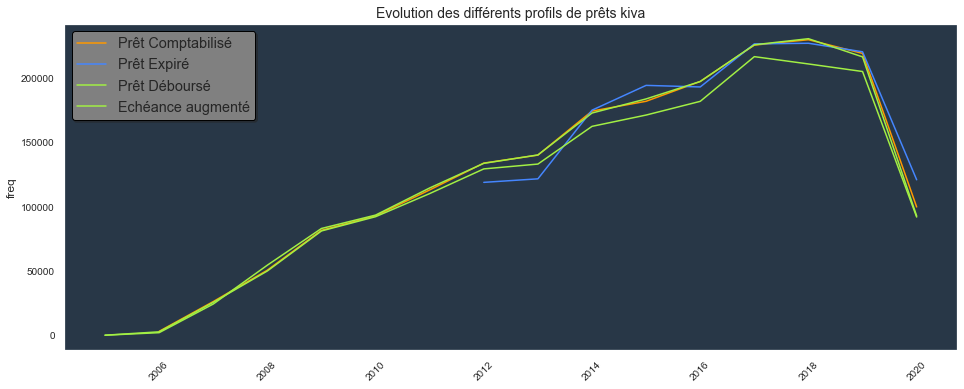

In [122]:
plt.figure(figsize=(16,6))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':10})
plt.title("Evolution des différents profils de prêts kiva",fontsize = 14)
plt.xticks(rotation=45) # Rotating X tickts by 45 degrees
sns.lineplot(x = df1.index.values, y = df1['freq'] , color = '#ff9900' , label= 'Prêt Comptabilisé')
sns.lineplot(x = df2.index.values, y = df2['freq'] , color = '#4586ff' , label = 'Prêt Expiré')
sns.lineplot(x = df3.index.values, y = df3['freq'] , color = '#a2ef44' , label = 'Prêt Déboursé')
sns.lineplot(x = df4.index.values, y = df4['freq'] , color = '#a2ef44' , label = 'Echéance augmenté')
plt.legend(facecolor= 'grey' , fontsize='large' , edgecolor = 'black' ,shadow=True) # Legend formatting
plt.show()

De cette sortie, on a retrace ainsi les activités de Kiva de sa création en 2005 jusqu'au 20/10/2020. On constate l'année 2018 représente celle où kiva a eu le plus grand nombre d'activité pour tous ces profils de prêts. Toutes fois, il importe de noter que la crise du covid a significativité impacté négativement les activités de kiva.

* Variables catégorielle

In [6]:
var_categoriel = ['LOAN_NAME','ORIGINAL_LANGUAGE','DESCRIPTION','DESCRIPTION_TRANSLATED','STATUS','ACTIVITY_NAME','SECTOR_NAME','LOAN_USE','COUNTRY_CODE','COUNTRY_NAME','TOWN_NAME','CURRENCY_POLICY','CURRENCY_EXCHANGE_COVERAGE_RATE','CURRENCY','TAGS','BORROWER_NAMES','BORROWER_GENDERS','BORROWER_PICTURED','REPAYMENT_INTERVAL','DISTRIBUTION_MODEL']
loan[var_categoriel] = loan[var_categoriel].astype('category')

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968819 entries, 0 to 1968818
Data columns (total 38 columns):
 #   Column                           Dtype              
---  ------                           -----              
 0   LOAN_ID                          int64              
 1   LOAN_NAME                        category           
 2   ORIGINAL_LANGUAGE                category           
 3   DESCRIPTION                      category           
 4   DESCRIPTION_TRANSLATED           category           
 5   FUNDED_AMOUNT                    float64            
 6   LOAN_AMOUNT                      float64            
 7   STATUS                           category           
 8   IMAGE_ID                         float64            
 9   VIDEO_ID                         float64            
 10  ACTIVITY_NAME                    category           
 11  SECTOR_NAME                      category           
 12  LOAN_USE                         category           
 13  COUNTRY_CODE

Une fois que nous connaissons le type de nos différentes variables, nous allons par suite identifier celles qui ne serons
pas utiles pour nos analyses et les supprimés pour ne retenir que les pertinentes. Comme par exemple, les variables `ACTIVITY_NAME` ne rapporte pas trop d'information étant donnée la disponibilité de la variable `SECTOR_NAME`; également pour la variable `IMAGE_ID`, on va préferé `BORROWER_PICTURED` qui renseigne si l'emprunteur a fourni sa photo ou pas.

In [7]:
# Liste des variables sans intérêt pour l'analyse
var_suprime = ['LOAN_NAME','ORIGINAL_LANGUAGE','IMAGE_ID','DESCRIPTION','ACTIVITY_NAME','TOWN_NAME','CURRENCY_POLICY','TAGS','BORROWER_NAMES']
#Suppression de ces dernières
loan_copy = loan.copy() # On fait copie de la base pour toujours avoir recours à la base source en cas de problème.
loan_copy = loan_copy.drop(var_suprime, axis=1)

print('Les dimensions de la nouvelle base de donnée sont :',loan_copy.shape)

Les dimensions de la nouvelle base de donnée sont : (1968819, 29)


## Analyse globale de la base de donnée
L'object de cette partie est de ressortie les caractéristiques globales de la base de données en terme de missing values et duplicates. Par la suite, nous allons procédé à une analyse beaucoup plus fine au niveau de chaque de variable, ce dans l'optique d'identifier les valeurs éventuelles valeurs abérrantes et autres.

* Missing values

<AxesSubplot:>

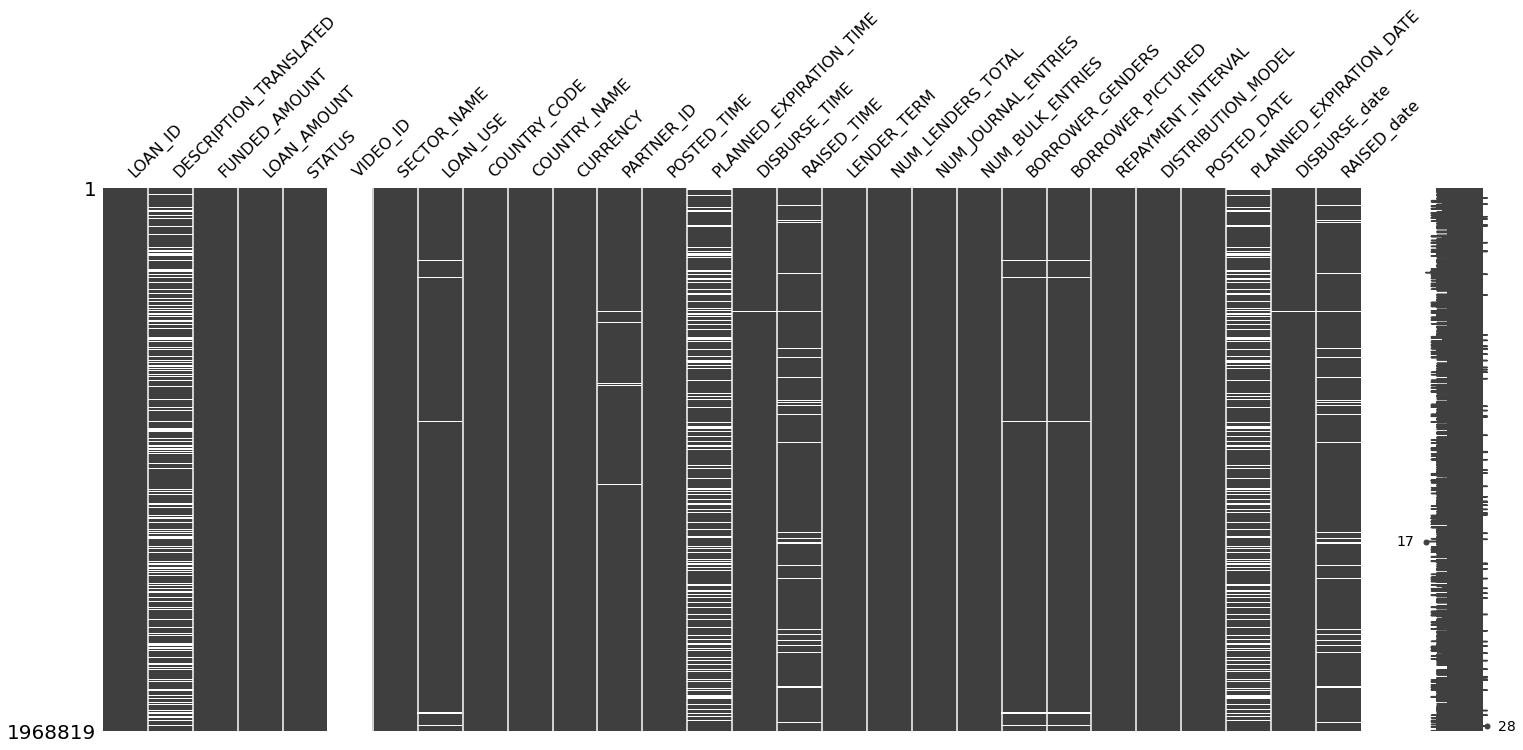

In [60]:
msno.matrix(loan_copy)

L'observation de cette sortie permet de constater que les variables `DESCRIPTION_TRANSLATED`, `VIDEO_ID`, `PLANNED_EXPIRATION_TIME`, `PLANNED_EXPIRATION_DATE`
presentent beaucoup de valeurs manquantes. Etant donné leur faible apport informationnel dans nos analyses,
nous allons nous en débarraser. Par ailleurs, notons aussi le cas de la variable **`CURRENCY_EXCHANGE_COVERAGE_RATE`** qui certe importante pour les analyses mais présente des valeurs manquantes. Pour cette dernière, nous allons la supprimer de la base de donnée et la remplacer par une variable avec un plus grand apport informationnel.En effet, dans la suite du travail, nous allons rechercher un site qui donne les taux d'échanges des différentes monnaies par rapport à l'euro et scrapper cette page pour ajouter cette information à notre base de donnée.

In [133]:
var_supprime2 = ['DESCRIPTION_TRANSLATED','CURRENCY_EXCHANGE_COVERAGE_RATE','VIDEO_ID','PLANNED_EXPIRATION_TIME','PLANNED_EXPIRATION_DATE']
loan_copy = loan_copy.drop(var_supprime2, axis=1)

In [134]:
# Affichage des statistiques sur les missing values
total = loan_copy.isnull().sum().sort_values(ascending = False)
percent = (loan_copy.isnull().sum()/loan_copy.isnull().count()).sort_values(ascending = False)
missing_loans_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_loans_data[missing_loans_data['Total']!=0]

,Total,Percent
RAISED_date,104534,0.053095
RAISED_TIME,104534,0.053095
LOAN_USE,45639,0.023181
BORROWER_PICTURED,45616,0.023169
BORROWER_GENDERS,45616,0.023169
PARTNER_ID,20303,0.010312
DISBURSE_date,3822,0.001941
DISBURSE_TIME,3822,0.001941
COUNTRY_CODE,33,0.000017
LENDER_TERM,24,0.000012


Nous avons les statistiques sur les valeurs manquantes des variables qui pourront potentiellement être entrées enjeu dans la construction de nos modèles de prédictions. Afin de bien comprendre le mécanisme de génération de ces valeurs manquantes et de les inputés dans le cas de détection d'une règle correcte, nous allons étudier au cas par cas ces variables.

* Duplicates

In [16]:
## Nombre de données dupliqués sur la base des id
loan_copy.duplicated(subset=['LOAN_ID' ]).sum()

0

Ainsi, on voit que notre base de données ne comporte pas d'observations dupliquées. Autrement dit, chaque prêt est identifiable par son identifiant.

## Analyses spécifiques des variables
Dans cette partie, nous allons procéder aux éventuelles recodifications, renomages et traitement des variables qui présentent des incohérences. Dans un premier temps, nous allons nous intéresser aux variables catégorielles, par suite nous mettrons le focus sur les variables quantitatives.

### Traitement des variables qualitatives


In [184]:
loan_copy.columns

Index(['LOAN_ID', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS', 'SECTOR_NAME',
       'LOAN_USE', 'COUNTRY_CODE', 'COUNTRY_NAME', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'DISBURSE_TIME', 'RAISED_TIME', 'LENDER_TERM',
       'NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'POSTED_DATE', 'DISBURSE_date', 'RAISED_date',
       'taux_euro_x', 'verif', 'taux_euro_y', 'col'],
      dtype='object')

* ***Status du prêt*** : 
Cette variable représente la variable centrale de l'étude, car c'est elle que l'on cherchera à expliquer par la suite grâce aux modèles prédictifs que l'on mettra en oeuvre. De ce fait en accord avec la partie revue de littérature, après avoir présenté quelques statistiques brèves sur cette dernière, nous allons la recodifier tel que précédemment indiqué.

In [135]:
pd.crosstab(loan_copy.STATUS,'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
STATUS,
expired,4.61
fundRaising,0.56
funded,94.37
refunded,0.45


On voit bien que les prêts remboursés représentent l'origine de l'activité de kiva. En effet, ces derniers représentent `94,37%` des prêts de la structure. Le taux de défaut des clients de kiva sur la période d'étude est de `4,61%`. Ainsi, dans la partie modélisaiton afin de construire nos modèles prédicitfs sur cette variable, nous adopterons un comportment bien précis et concis en adéquation avec les études réalisées dans ce cas de figure.

Comme enseignement de la revue, nous allons à présent recodifier cette variable à fin d'avoir les entrepreneurs ayant fait défaut et ceux qui ne sont pas dans cette situation.

In [136]:
loan_copy['target'] = np.where(loan_copy['STATUS'] == 'expired', 0, 1)

In [137]:
labels = { 0 : 'defaut', 1 : 'succes'}
loan_copy['target'].apply(labels.get)
pd.crosstab(loan_copy['target'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
target,
0,4.61
1,95.39


Le taux de défaut global des entreprunteurs de kiva est de `4,61%`. Par la suite nous allons tirer un échantillon dans le groupe des entrepreneurs à succès pour construire les différents modèles.

* Secteur d'activité : 

In [138]:
print(' Nous avons au total', len(loan_copy.SECTOR_NAME.unique()), " différentes secteurs d'activités supportées par le financement de la kiva",
     "\n En termes d'activités impactées par kiva, elles sont au nombres de : ",len(loan['ACTIVITY_NAME'].unique()),'activités.')

 Nous avons au total 15  différentes secteurs d'activités supportées par le financement de la kiva 
 En termes d'activités impactées par kiva, elles sont au nombres de :  163 activités.


In [139]:
pd.crosstab(loan_copy['SECTOR_NAME'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
SECTOR_NAME,
Agriculture,25.47
Arts,2.02
Clothing,5.43
Construction,1.22
Education,3.50
Entertainment,0.13
Food,22.00
Health,1.42
Housing,5.26


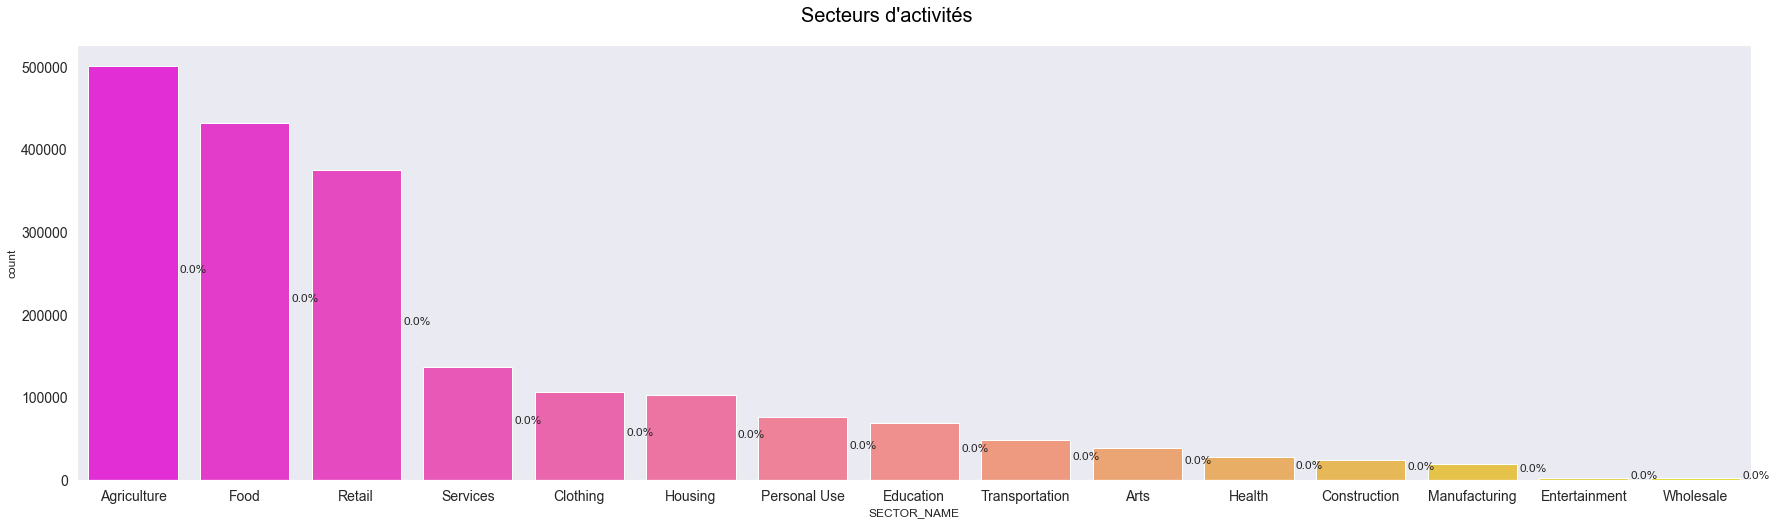

In [140]:
plt.figure(figsize=(30,8))
sns.set(rc={"axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
plt.gcf().text(.5, .93, "Secteurs d'activités", fontsize = 20, color='black' ,ha='center', va='center')
ax = sns.countplot(x=loan_copy['SECTOR_NAME'] , order =loan_copy['SECTOR_NAME'].value_counts().index , palette="spring")

total = len(loan_copy['SECTOR_NAME'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()


Etant donné que les pays sous-développés sont généralisé par la forte dépendance au secteur agricole, les données de kiva retrace parfaitement cette réalité. En effet, l'agriculture est le secteur d'activité le plus financé, à lui seul, il représente la destination de `25%` des prêts des entrepreneurs demandeurs de fonds à kiva. Ce dernier est sécondé par le secteur alimentaire qui représente prêt de `22%` des prêts de la structure. Le secteur manufacturié, du divertissement et des grossistes sont les moins représentés avec respectivement une part de `1,01%`, `0,13%` et `0,12%`.

Comme tenu du grand nombre de modalité de cette variable, nous allons la recoder. comme procédé de recodage, nous allons recoder tout en recherchant un équillibre au niveau des différentes modalités. Ainsi, les 3 modalités les plus représentatives seront laissées telles qu'elles ; les modalités `Clothing`; `Housing` et `Personnal Use` seront regroupées en la modalité `Bien_Menage`  et les autres variables serons dans la modalité autre.


In [142]:
Bien_Menage = ['Clothing','Housing','Personnal Use']
autre_secteur = ['Services','Education','Transportation','Arts','Health','Construction','Manufacturing','Entertainment','Wholesale']
conditions = [
    (loan_copy.SECTOR_NAME == 'Agriculture'),
    (loan_copy.SECTOR_NAME == 'Food'),
    (loan_copy.SECTOR_NAME == 'Retail'),
    (loan_copy.SECTOR_NAME == 'Clothing') | (loan.SECTOR_NAME == 'Housing') | (loan.SECTOR_NAME == 'Personal Use'),
    (loan_copy.SECTOR_NAME == 'Services') | (loan.SECTOR_NAME == 'Education') | (loan.SECTOR_NAME == 'Transportation') | (loan.SECTOR_NAME == 'Arts') | (loan.SECTOR_NAME == 'Health') | (loan.SECTOR_NAME == 'Services') | (loan.SECTOR_NAME == 'Construction') |  (loan.SECTOR_NAME == 'Manufacturing') | (loan.SECTOR_NAME == 'Entertainment') | (loan.SECTOR_NAME == 'Wholesale')
]
values = ['Agriculture','Food','Retail','Bien_Menage','autre_secteur']
loan_copy.SECTOR_NAME = np.select(conditions, values)

pd.crosstab(loan_copy['SECTOR_NAME'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
SECTOR_NAME,
Agriculture,25.47
Bien_Menage,14.57
Food,22.00
Retail,19.10
autre_secteur,18.87


Text(0.5, 1.0, 'Distribution of sectors')

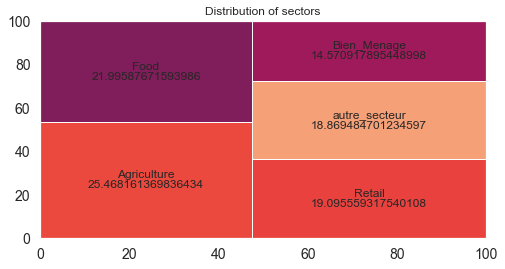

In [145]:
plt.figure(figsize=(8,4))
count = loan_copy['SECTOR_NAME'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=100*(count.values/len(loan_copy['SECTOR_NAME'])))
plt.title('Distribution of sectors')

* **Monnaie utilisé** : 
Comme observé dans la partie analyse globale, la variable `taux de change` de la base de donnée présentait beaucoup de valeurs manquantes et ne repoindaient pas à nos attentes. Ainsi, nous avions opté de la supprimer. Nous allons ici completer notre base de donnée avec une variable taux d'échange qui sera issu d'une opération de webscrapping sur une page web. Lors de ce processus de recupération des informations online et del'ajout des ces derniers à notre base de donnée, nous allons explorer la variable `currency` en corrigeant les éventuelles erreures sur cette dernière.

#### conversion de la monnaie en euro
Dans l'optique de disposer de la variable taux d'échange qui nous permettra la conversion de toutes les monnaies présentes en **`euro (€)`** , nous faisons le scraping sur ce site: https://www.xe.com/en/currencytables/?from=EUR et utilisons `BeautifulSoup`pour avoir "comprendre" le texte ainsi scrappé.

In [146]:
url = 'https://www.xe.com/en/currencytables/?from=EUR'

In [147]:
request_text = request.urlopen(url).read()
page = bs4.BeautifulSoup(request_text, 'lxml')
#print(page.prettify())

tableau = page.find('div', class_='historicalRateTable-wrap')
#print(tableau)

# Récupération des abréviations des différentes monnaies
CURRENCY = []
for currency in tableau.tbody.findAll('tr'):
    CURRENCY.append(currency.a.text)

In [149]:
# Récuration des taux de convertions
exchange = []
for taux in tableau.tbody.findAll('tr'):
    exchange.append(taux.find('td',class_='historicalRateTable-rateHeader').text)
    
#Assemblement de ces listes dans le tableau final
result_currency = pd.DataFrame(columns=['CURRENCY','taux_euro'])
result_currency['CURRENCY'] = CURRENCY
result_currency['taux_euro'] = exchange
result_currency.head()

,CURRENCY,taux_euro
0,USD,1.2142161211
1,EUR,1.0000000000
2,GBP,0.9128320256
3,INR,89.5861340301
4,AUD,1.6113804222


In [150]:
## Ajout des variables à la base de donnée
currency_database = pd.unique(loan_copy['CURRENCY']).tolist()
print(' Le nombre totale de monnaie est de : ',len(CURRENCY),
     '\n Le nombre de monnaie présent dans notre base de donnée est :',len(currency_database),
     "\n On s'attend à avoir exactement <<", len(CURRENCY) - len(currency_database),">> monnaies qui ne sont pas dans les deux listes." )

 Le nombre totale de monnaie est de :  167 
 Le nombre de monnaie présent dans notre base de donnée est : 78 
 On s'attend à avoir exactement << 89 >> monnaies qui ne sont pas dans les deux listes.


In [151]:
len(list(set(CURRENCY) - set(currency_database))) # La taille de la différence entre les deux listes.

91

On constate qu'il y'a deux monnaies présentent dans notre base de données qui ne sont pas dans la liste complètes de monnaies. Ainsi, on présuppose
que ces dernieres ont été mal libelées. Identifions ces monnaies.

In [152]:
# Boucle pour identifier les libelés des monnnaies érronés.
currency_error = []
for i in currency_database:
    if i not in CURRENCY:
        currency_error.append(i)
        print(i)

SSP
ZMK


A l'observation de ces derniers, on peut supposer que `ZMK` correspond plutôt à `ZMW` qui est la monnaie de `Zambian Kwacha` sur le site de référence. Afin de s'affranchir
de toute confusion nous allons identifer les pays qui ont ces monnaies, se reférer à la table et parsuite les remplacer.

In [153]:
# Recherhe de l'index des pays ayant une monnaie mal renseignée
index_erreur = []
for j in range(len(loan_copy.COUNTRY_NAME)):
    for k in range(len(currency_error)):
        if currency_error[k] == loan_copy.CURRENCY[j]:
            index_erreur.append(loan_copy.COUNTRY_NAME[j])

In [154]:
pays_1 = index_erreur[0]
for i in range(len(index_erreur)):
    if index_erreur[i]!=pays_1:
        print('Les pays ayant un libelé de monnaie mal renseignés sont : ', 
              '\n * ',pays_1,
              '\n * ',index_erreur[i])
        break

Les pays ayant un libelé de monnaie mal renseignés sont :  
 *  South Sudan 
 *  Zambia


Ainsi, on voit bien que les deux pays pour lesquels les monnais on été mal libelés sont le `South Sudan` et la `Zambia`. Ainsi, on voit bien que la précédente inturtion était correcte. En outre il importe de souligné l'importance d'avoir fait ce travail, car si on supprimait ces pays, on devait impiété négativement sur la performance du modèle à mettre sur-pied.

Dans le site de référence, la monnaie du `South Sudan` est appelé `Sudanese Pound` et est abbrégé `SDG`. Par suite, dans notre base de donnée, nous allons effectuer les changements suivants sur la variable currency :
* `SSP` en `SDG`
* `ZMK` en `ZMW`

In [155]:
print(" On vérifie si les libéles 'SDG' et 'ZMK' était déjà dans la liste de la base de données. :",
      '\n*  SDG in list : ', 'SDG' in currency_database,
     '\n*  ZMW in list : ', 'ZMK' in currency_database)

 On vérifie si les libéles 'SDG' et 'ZMK' était déjà dans la liste de la base de données. : 
*  SDG in list :  True 
*  ZMW in list :  True


Ainsi on voit qu'effectivement les deux libélés étaient déjà présents dans la base de donnée, ces erreurs pourraient probablement avoir pour
origine une erreur de saisit. 

In [156]:
# Remplace les libelés de monnaie de la base donnée
loan_copy['CURRENCY'] = loan_copy['CURRENCY'].replace({'SSP': 'SDG', 'ZMK': 'ZMW'})
new_currency_database = pd.unique(loan_copy['CURRENCY']).tolist()

len(new_currency_database)

76

A ce niveau, on est bien certain que tous les libelés de monnaies présents dans la base de données le sont également dans le libelé au niveau internationnal.

Nous allons ajouter la base de donnée scrapper, contenant le taux de change des monnaies par rapport à l'euro à notre base de donnée.

In [208]:
# Conversion de la colonne new_currency_database en base de donnée
df1 = pd.DataFrame({'col':new_currency_database})
# Fusion des bases de données pour en retenir uniquement les monnaies des présentes dans la base de données
currency = pd.merge(result_currency, df1, how = 'right', left_on = ['CURRENCY'],right_on = ['col']).sort_values('CURRENCY')

# Ajout de la variable taux de change à la base de données
loan_copy = pd.merge(loan_copy, currency, on='CURRENCY', how='outer')

Maintenant que nous avons le taux de conversion des différentes monnaies à l'euro, nous allons diviser toutes les variables
concernant les montant libélé en monnaies nationales par l'euro. Rappelons que l'importance de démarche réside dans la facilité des
interprétations qu'elle procure. En outre, grâce à cette conversion, les interprétations, analyses et comparaisons serons beacoup
plus facilent et clairent.

* **Sexe de l'emprunteur**

In [8]:
len(pd.unique(loan_copy['BORROWER_GENDERS']))

24167

On constate que la variable sexe a 24 167 modalités. Nous allons comprendre cette erreur et la corriger car cette variable a un grand pouvoir informationnel.

In [9]:
pd.crosstab(loan_copy['BORROWER_GENDERS'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
BORROWER_GENDERS,
female,63.53
"female, female",1.40
"female, female, female",1.40
"female, female, female, female",1.08
"female, female, female, female, female",1.08
...,...
"male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male",0.00
"male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male",0.00
"male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, female, male, male, male",0.00


In [162]:
pd.crosstab(loan_copy['BORROWER_GENDERS'].isna(),'freq')

col_0,freq
BORROWER_GENDERS,
False,1923203
True,45616


Pour cette variable, nous avons 45 616 observations non renseignées. Etant donnée la distribution des erreurs au niveau des observations renseignées, nous soupçonnons que ces dernieres doivent contenir de l'information sur le mécanisme générateur des valeurs manquantes. Ainsi, pour bien comprendre ce mecanisme générateur de ces valeurs manquantes et les erreurs sur les modalités de cette variable, nous d'abord procéder à une bonne visualisation beaucoup plus large de cette variable.

In [163]:
# Configuration pour permettre l'affichage de plusieurs lignes
pd.set_option('display.max_rows', None)

In [164]:
# Affichage des 100 premières observations pour comprendre la structure des données
loan_copy['BORROWER_GENDERS'][:100]

0                                                female
1                                                female
2                                                female
3                                                female
4                                                female
5                                                female
6                                                female
7                                                female
8                                                female
9                                                female
10                                               female
11                                               female
12                                               female
13                                               female
14                                               female
15                                               female
16                                                  NaN
17                                              

In [165]:
pd.reset_option('^display.', silent=True) # Remet l'option d'affichage par défaut

Comme on peut le voir avec cette sortie, les soupçons précédement émis s'avèrent fausses. En effet, les observations autour de la valeurs manquantes sont très bien renseignées. Ceci ne nous renseigne pas spécifiquement sur l'origine de ces dernieres. Ainsi, par suite, nous allons les supprimer par manque d'informations additionnelles pour procéder à une éventuelle imputation. En outre, concernant les observations renseignées, ces derniers aussi posent un problème. En effet, comme on peut l'observer à les lignes `17`, `23` et `54`, une observation erronée contient à la fois la modalité **homme** et **femme**. Afin d'être cohérent dans notre démarche, nous allons uniquement retenir la première occurence. C'est à dire pour l'observation les observations susmentionnées, nous allons en retenir respectivement : `female`, `male`, `male`.

Nous allons dans la suite, dans un premier temps supprimer les observations ayant les valeurs manquantes pour la variable `Gender` sur la base totale. Ensuite, nous  allons procéder à la correction des modalités de cette variable.

In [10]:
# Suppression des missings values
loan_copy = loan_copy.dropna(how='all', subset=['BORROWER_GENDERS'])

In [167]:
sexe = loan_copy['BORROWER_GENDERS'].tolist()
len(sexe); sexe[0].split(',')[0]

'female'

In [168]:
# Boucle qui permet de recupérer le premiere la premiere occurence de chaque modalité
sexe_correct = []
for i in range(len(sexe)):
    sexe_correct.append(sexe[i].split(',')[0])

In [169]:
loan_copy['BORROWER_GENDERS'] = sexe_correct

In [170]:
print(' Le nombre de modalité de la variable obtenu est de : ',len(loan_copy['BORROWER_GENDERS'].unique()),
      "\n Le nombre d'observation de la variable est de :  ",len(loan_copy['BORROWER_GENDERS']))

 Le nombre de modalité de la variable obtenu est de :  3 
 Le nombre d'observation de la variable est de :   1923203


In [171]:
pd.crosstab(loan_copy['BORROWER_GENDERS'],'freq')

col_0,freq
BORROWER_GENDERS,
female,1474910
male,448257
unspecified,36


Comme on peut le constater, il y'a encore une modalité incorrecte à savoir `unspecified`. Nous allons encore supprimer toutes les observation de la base de donnée correspond à cette observation.

In [172]:
loan_copy.drop(loan_copy.index[loan_copy['BORROWER_GENDERS'] == 'unspecified'], inplace = True)

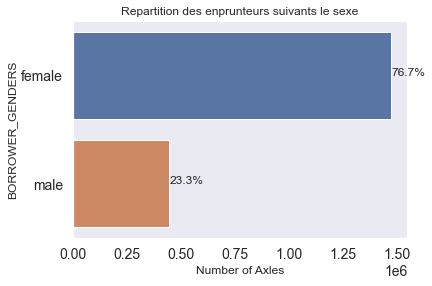

In [173]:
ax = sns.countplot(y="BORROWER_GENDERS", data=loan_copy)
plt.title('Repartition des enprunteurs suivants le sexe')
plt.xlabel('Number of Axles')

total = len(loan_copy['BORROWER_GENDERS'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Comme l'illustre cette sortie graphique, on voit bien que la plupart des entrepreneurs des pays sous dévéloppés qui empruntent des fonds d'investissements chez kiva sont les femmes. Ceci est en parfaite adéquation avec les résultats du secteur d'activités où il en est ressorti que le secteur le plus impacté par les prêts par les prêts de kiva est le `secteur agricole`. Car, dans ces pays, les femmes sont généralement plus présentes dans le secteur agricole.

* **L'utilisation du prêt** : 
Cette variable revêt un caractère très important pour cette étude car elle permet de savoir l'utilisation qui est fait des fonds que kiva met à la disposition de ses emprunteurs. Ainsi, nous allons nous atteler à bien comprendre enfouie dans cette dernière. Pour parvenir à cette fin, étant que cette variable résulte d'une question ouverte, nous allons faire appel aux techniques de **`NPL (Natural Language Processing)`** pour extraire les informations contenues dans cette variable. En adéquation avec cette article qui explique les différentes étapes étapes et l'intérêt du NPL pour la compréhension du langage humain par la machine (https://medium.com/@ageitgey/natural-language-processing-is-fun-9a0bff37854e), la réalisation de notre algorithme va suivre les étapes suivantes : 
- **La détection de la langue**
- **La "tokenisation"**
- **La suppression des "stop-words"**
- **La lemmatisation**

#### La détection de la langue : 
Nous allons commencer par supprimer les valeurs manquantes de cette variable. Ensuite, il est important de déterminer la langue dans laquelle la description du prêt est rédigée. Ceci permettra d'utiliser le dictionnaire adéquat lors de la réalisation des prochaines étapes.

In [174]:
# Recherche des valeurs manquantes de la série (différente de la méthoe traditionnelle)
description = loan_copy['LOAN_USE'].tolist()
desc_pb = []
for myst in description:
    if isinstance(myst,float): # Les variables nan sont de type float 
        desc_pb.append(myst)

print(' Ainsi on obtient ', len(desc_pb),' valeurs manquantes',
     "\n Etant donné l'importance de cette variable, nous allons supprimer toutes les observations présentant les valeurs manquantes.")

 Ainsi on obtient  23  valeurs manquantes 
 Etant donné l'importance de cette variable, nous allons supprimer toutes les observations présentant les valeurs manquantes.


In [176]:
loan_copy = loan_copy.dropna(how='all', subset=['LOAN_USE'])

# Affichage d'une ligne de la série
loan_copy.at[100,'LOAN_USE']

'to purchase more items to sell.'

In [178]:
# Taille des message de description du prêt
loan_copy['length'] = loan_copy['LOAN_USE'].map(len,)
#groupe suivant le statut du prêt
loan_copy.groupby('target').length.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,90782.0,66.556884,34.295801,1.0,41.0,61.0,86.0,371.0
1,1832362.0,58.432654,30.991035,1.0,36.0,52.0,74.0,2149.0


Cette sortie permet de mettre en évidence la correlation entre la taille de la description du prêt et le fait d'être en défaut ou non. Comme on le voit, la taille de la description des emprunts à succès est beaucoup plus grande que ceux qui ont fait défaut. Toutes fois, il importe de noter le caractère falacieux de cette corrélation car la variable profil de l'emprunteur ne discrimine pas bien la population (seulement 4% sont en défaut). 

Ainsi, étant donné la complexité et demande en capacité exécive des alogorithmes d'applications du **`NLP`**, cette partie sera adordé dans le détail dans la partie **`Analyse exploratoire`**.

* **Pays de destination du prêt** : 

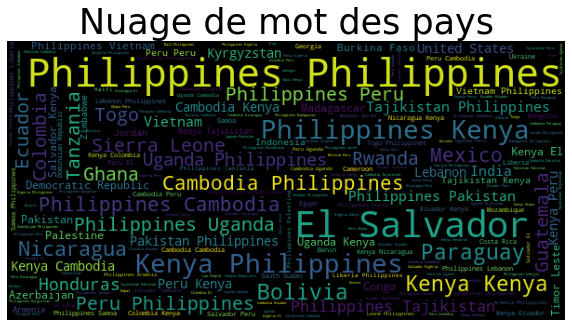

In [11]:
names = loan_copy["COUNTRY_NAME"][~pd.isnull(loan_copy["COUNTRY_NAME"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.title("Nuage de mot des pays", fontsize=35)
plt.axis("off")
plt.show() 

De cette sortie de nuage graphique, on voit clairement la `philippine` est le pays ayant le plus entrepreneur financé par kiva. Aussi, il apparait clairement que les pays tel que le `Kenya`, la `Colombie`, l'`Ouaganda`, `El salvador` ne sont pas en reste. Afin d'en avoir davantage d'informations, nous allons faire une représentation graphique avec les différentes proportions.

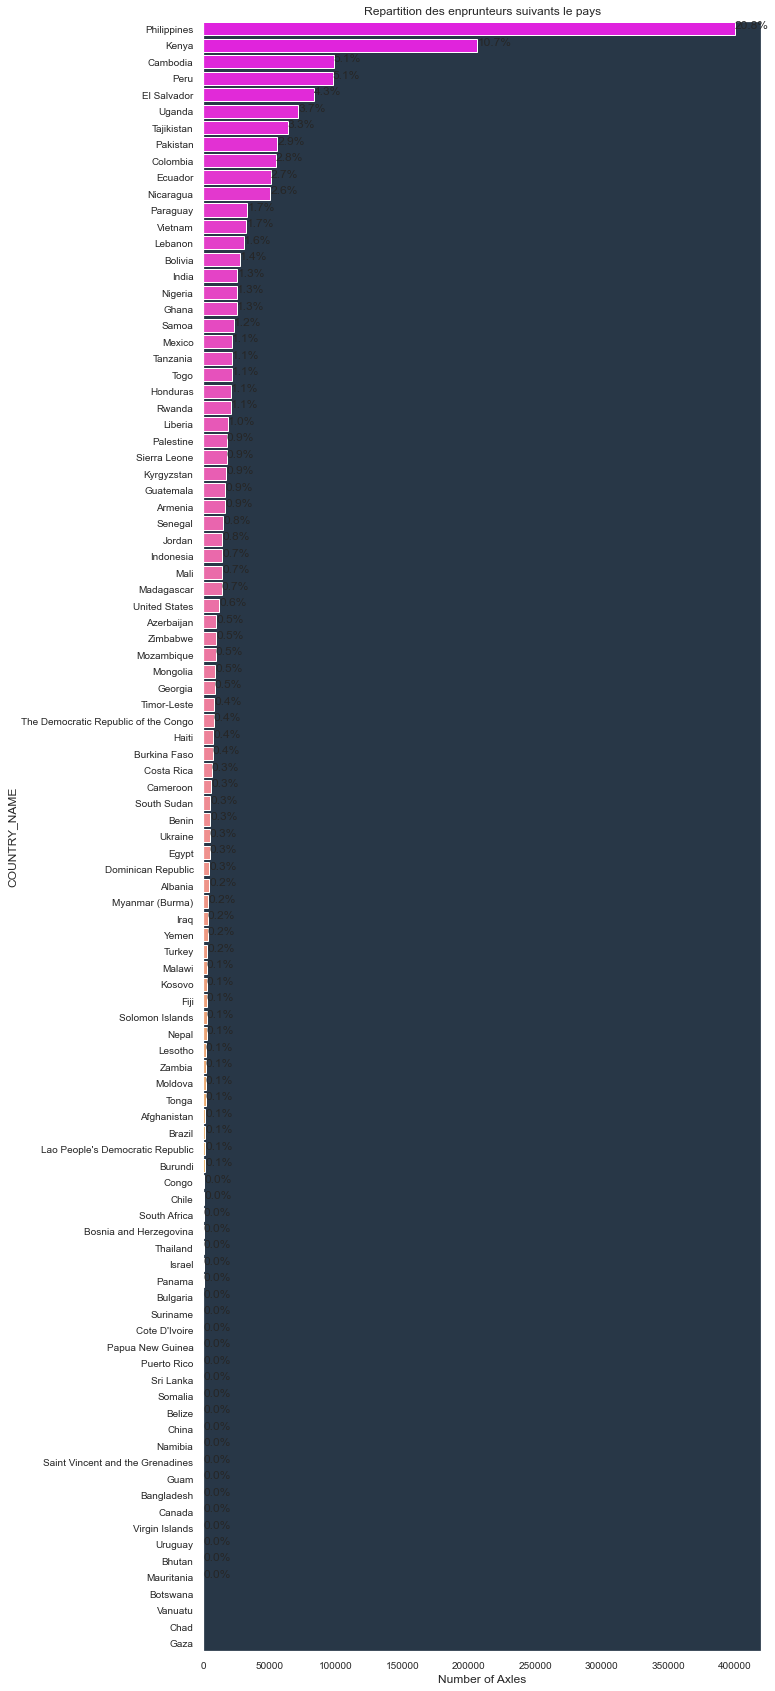

In [51]:
plt.figure(figsize=(10,30))
ax = sns.countplot(y="COUNTRY_NAME", data=loan_copy, order =loan_copy['COUNTRY_NAME'].value_counts().index , palette="spring")
#ax = sns.countplot(x=loan_copy['SECTOR_NAME'] )

plt.title('Repartition des enprunteurs suivants le pays')
plt.xlabel('Number of Axles')

total = len(loan_copy['COUNTRY_NAME'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

A l'observation de ce graphique, il en ressort que sur la période d'étude, l'activité de kiva à touché **`95 pays`**. Parmi ces pays, ceux ayant été les plus dynamiques sont `Philippines`, `Kenya`, `Cambodia`, `peru` et `El Salvador`. De ce fait,ces 5 pays sont les premiers ayant le plus grand nombre d'entrepreneurs qui ont kiva comme source de financement. Par suite, dans l'optique d'avoir une vision beaucoup plus de l'impact du travail de kiva, nous opté pour une présentation graphique beaucoup plus informative. En effet, nous nous donnons pour ambittion de faire une réprésentation spatiale des pays en utilisant leurs coordonnés géographiques (longitude, latitude). Cette représentation présente le fort intérêt de nous permettre de faire une recodification de la variable en continent, ainsi, elle pourra être pris en compte dans la modélisation. 

Pour parvenir à la réalisaiton de ce challenge, nous allons, dans un premier temps rechercher l'information en ligne sur les coordonnées géographiques des différents pays. Par suite, nous utiliserons les bibliothèques adéquates pour faire la représentation graphique. Les informations à scrapper sont disponible à l'adresse suivante : https://developers.google.com/public-data/docs/canonical/countries_csv.

In [184]:
url_pays = 'https://developers.google.com/public-data/docs/canonical/countries_csv'
request_text = request.urlopen(url_pays).read()
pays = bs4.BeautifulSoup(request_text, 'lxml')
#print(pays.prettify())

In [185]:
tab_pays = pays.find('div', class_='devsite-article-body clearfix').table
#print(tab_pays)

In [186]:
code = []
lat = []
long = []
for l in tab_pays.findAll('tr'):
    code.append(l.text.split('\n')[1])
    lat.append(l.text.split('\n')[2])
    long.append(l.text.split('\n')[3])

In [187]:
#Assemblement de ces listes dans le tableau final
data_pays = pd.DataFrame(columns=['code_pays','latitude','longitude'])
data_pays['code_pays'] = code[1:]
data_pays['latitude'] = lat[1:]
data_pays['longitude'] = long[1:]
data_pays.head()

,code_pays,latitude,longitude
0,AD,42.546245,1.601554
1,AE,23.424076,53.847818
2,AF,33.93911,67.709953
3,AG,17.060816,-61.796428
4,AI,18.220554,-63.068615


In [188]:
# On recherche si l'ensembles des codes des pays dans la base de donnée sont correctes
code_db = loan_copy['COUNTRY_CODE']
code_pb = []
for i in code_db:
    if i not in code:
        code_pb.append(i)


In [190]:
used = []
unique = [used.append(x) for x in code_pb if x not in used]
used

[]

On constate bien que les valeurs de codes pays ne figurent pas dans la liste des codes de pays sont les valeurs manquantes (`nan`) et le code `SS`. Pour les valeurs manquantes, nous allons vérifier si nous avons de l'information sur le pays de ces derniers et les imputer par le code correspondant, le cas échéant ils seront tout simplement supprimé de la base de donnée. Concernant le code `SS` nous soupçonnons qu'il s'agit du code du `Soudan du Sud`.

In [191]:
print('le pays ayant un code pays SS est : ', loan_copy.query('COUNTRY_CODE == "SS"')['COUNTRY_NAME'].unique())

le pays ayant un code pays SS est :  [], Categories (0, object): []


In [192]:
print(" Le pays pour lequel le code n'est pas renseigné est : ",loan_copy[loan_copy['COUNTRY_CODE'].isna()]['COUNTRY_NAME'].unique(),
      "\n Le nombre de valeurs manquantes de la variable nom du pays est : ",loan_copy[loan_copy['COUNTRY_NAME'].isna()].shape[0])

 Le pays pour lequel le code n'est pas renseigné est :  [], Categories (0, object): [] 
 Le nombre de valeurs manquantes de la variable nom du pays est :  0


In [193]:
# Imputation du code pays
loan_copy['COUNTRY_CODE'] = np.where(loan_copy['COUNTRY_CODE'] == 'SS','SD',loan_copy['COUNTRY_CODE'])
loan_copy['COUNTRY_CODE'] = np.where(loan_copy['COUNTRY_CODE'].isna(),'NA',loan_copy['COUNTRY_CODE'])

In [194]:
code_pays_dbase = pd.unique(loan_copy['COUNTRY_CODE']).tolist()
nom_pays_dbase = pd.unique(loan_copy['COUNTRY_NAME']).tolist()
# Conversion de la colonne new_currency_database en base de donnée
df_code = pd.DataFrame({'COUNTRY_CODE':code_pays_dbase, 'COUNTRY_NAME':nom_pays_dbase})
# Fusion des bases de données pour en retenir uniquement les monnaies des présentes dans la base de données
COORD_GEO = pd.merge(data_pays, df_code, how = 'right', left_on = ['code_pays'],right_on = ['COUNTRY_CODE']).sort_values('COUNTRY_CODE')

In [12]:
# Récupération des varibles d'intérêts à savoir : nom du pays et la nombre d'emprunteurs du pays.
con_df = pd.DataFrame(loan_copy['COUNTRY_NAME'].value_counts()).reset_index()
con_df.columns = ['country', 'num_loans']
con_df = con_df.reset_index().drop('index', axis=1)

In [13]:
# définition d'un dictionnaire comportant les informations nécessaires pour la représentation graphique
data = [ dict(  
    # Pour préciser les différentes variations spaciales des emprunteurs par pays
        type = 'choropleth',
    # Définition des pays d'intérêts avec le nombre d'emprunteur par pays
        locations = con_df['country'], 
        locationmode = 'country names',
        z = con_df['num_loans'],
        text = con_df['country'],
    # Définition des options d'affichage
        colorscale = [[0,"rgb(5, 10, 172)"],[0.85,"rgb(40, 60, 190)"],[0.9,"rgb(70, 100, 245)"],\
            [0.94,"rgb(90, 120, 245)"],[0.97,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = "Nombre d'emprunteurs"),
      ) ]

# Définition des options d'affichages des différentes couches
couche = dict(
    title = "Visualisation des emprunteurs par pays",
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=couche )
py.iplot( fig, validate=False, filename='Graphique des emprunts par pays')

Cette sortie graphique permet d'avoir une bonne représentation spaciale des pays membres de kiva. Aussi, elle met en eczergue l'empleur des activités de kiva suivant les différents pays. L'intérêt principal de ce graphique est de permettre de savoir la représentation des pays suivant les différents continents. On voit bien que le continent Africain abrite le plus grand nombre de pays membre de kiva. Toute fois, il faut noter qu'en terme de participation (quantité de monnaie emprunté), c'est le continent asiatique qui est en tête de liste. Dans nos modèles de prédictions, nous essaierons de voir si le fait d'être dans un pays a un impact sur la probabilité d'être en défaut. Etant donné que nous avons **`99 pays`**, nous allons regroupé ces pays suivant les continents. Il est claire que cette approche présente une limite en terme de réprésentation du continent, mais elle nous permettra de savoir si c'est c'est le quantité (en terme de participant) qui importe ou alors la qualité (montant des emprunts) qui est plus lié au status de l'emprunteur. 

In [14]:
# Fonction de regroupement des pays par continent
def pays_par_continent(country_name):
    while True:
      try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
        break
      except KeyError:
        return 'Unknown'
    
loan_copy['CONTINENT'] = loan_copy['COUNTRY_NAME'].apply(pays_par_continent)

#vérification du rendu :
loan_copy['CONTINENT'].unique()

array(['Asia', 'South America', 'Africa', 'Oceania', 'North America',
       'Europe', 'Unknown'], dtype=object)

In [15]:
# On voit bien la présence de la modalité Unknown que nous allons corrigé
# Recherchons les pays à cette modalité
loan_copy[loan_copy['CONTINENT']=='Unknown']['COUNTRY_NAME'].unique()

['The Democratic Republic of the Congo', 'Timor-Leste', 'Kosovo', 'Myanmar (Burma)', 'Cote D'Ivoire', 'Virgin Islands']
Categories (6, object): ['The Democratic Republic of the Congo', 'Timor-Leste', 'Kosovo', 'Myanmar (Burma)', 'Cote D'Ivoire', 'Virgin Islands']

In [16]:
loan_copy.CONTINENT = np.where((loan_copy.COUNTRY_NAME == 'The Democratic Republic of the Congo') | (loan_copy.COUNTRY_NAME == "Cote D'Ivoire"),'Africa',loan_copy.CONTINENT)
loan_copy.CONTINENT = np.where((loan_copy.COUNTRY_NAME == 'Timor-Leste')  | (loan_copy.COUNTRY_NAME == 'Myanmar (Burma)'),'Asia',loan_copy.CONTINENT)
loan_copy.CONTINENT = np.where((loan_copy.COUNTRY_NAME == 'Virgin Islands'),'North America',loan_copy.CONTINENT)
loan_copy.CONTINENT = np.where((loan_copy.COUNTRY_NAME == 'Kosovo'),'Europe',loan_copy.CONTINENT)
loan_copy.CONTINENT.unique()

array(['Asia', 'South America', 'Africa', 'Oceania', 'North America',
       'Europe'], dtype=object)

In [17]:
cnt_srs = loan_copy['CONTINENT'].value_counts().head(25)
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Rainbow',
        reversescale = True
    ),
)

layout = dict(
    title='Représentation des emprunteurs par continent',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="continent_emprunteur")

La précédente représentation spaciale qui laissait nous permit de constater que le continent africain abritait le plus grand nombre de pays membre de kiva. Ce graphique nous enseigne que le continent concentrant le plus d'emprunteur est le continent asiatique.

* **La photo de l'emprunteur est elle disponible ?**

In [201]:
pd.crosstab(loan_copy['BORROWER_PICTURED'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1)

col_0,freq
BORROWER_PICTURED,
"false, false, false, true, true, true, true, true, false, true, true, false, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, false, true, true, true, false, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000052
...,...
"true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000156
"true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000104
"true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000468


Nous sommes encore confronté à la même difficulté que précédemment. Cette variable sera très importante pour notre modèle de prédiction, car elle permettra de savoir si le fait pour un entrepreneur de donner sa photo est gage de bonne conduite de sa part. Ainsi, nous allons nous attelé à corriger cette variables avec les considérations précédemment énoncées. A savoir ne retenir que les premières occurences des modalités et étandre la suppression des missings values à toute la base de donnée.

In [203]:
# Suppression des missings values
loan_copy = loan_copy.dropna(how='all', subset=['BORROWER_GENDERS'])

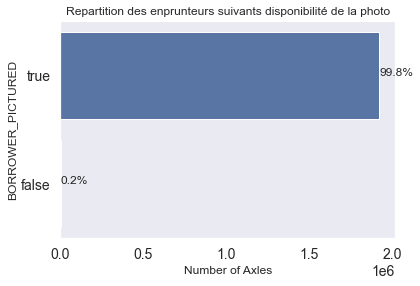

In [204]:
photo = loan_copy['BORROWER_PICTURED'].tolist()
# Boucle qui permet de recupérer le premiere la premiere occurence de chaque modalité
photo_correct = []
for i in range(len(photo)):
    photo_correct.append(photo[i].split(',')[0])

loan_copy['BORROWER_PICTURED'] = photo_correct

ax = sns.countplot(y="BORROWER_PICTURED", data=loan_copy)
plt.title('Repartition des enprunteurs suivants disponibilité de la photo')
plt.xlabel('Number of Axles')

total = len(loan_copy['BORROWER_PICTURED'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Comme illsutré par le graphique, seulement `0,2%` des emprunteurs de kiva n'ont pas envoyer de photo leur photo. Ainsi, on peut déjà présumé que cette variable ne serait pas un bon prédicteur car ne permet pas de discriminer les profils des defauts et bons des entrepreneurs. Toutes fois dans la suite, des analyses appropriées seront menées à cette fin.

* **Intervalle de remboursement**

In [205]:
pd.crosstab(loan_copy['REPAYMENT_INTERVAL'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
REPAYMENT_INTERVAL,
bullet,9.07
irregular,4.34
monthly,86.58


Les prêts de kiva sont le plus fréquemment remboursé à intervalle mensuels, soit `86,58%`. La modalité **`bullet`** représente les autres types de remboursement à fréquence régulières qui ne sont pas mensuels. Et ces derniers sont effectués par `9,07%` des entrepreneurs.

* **Model de distribution du prêt** : 
Il est important de noter que pour bénéficier d'un prêt en provenance de kiva, soit l'entrepreneur fait recours à une structure partenaire, soit elle demande directement auprès de l'organisation. Ainsi, cette variable permet de capter le moyen d'obtention du prêt.

In [83]:
pd.crosstab(loan_copy['DISTRIBUTION_MODEL'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
DISTRIBUTION_MODEL,
direct,1.03
field_partner,98.97


Comme l'illustre cette sortie, la presque totalité des prêts occtroiyés par kiva sont faits par leurs strutures partenaires qui sont présents qu niveau local dans l'ensmebles des pays membres.

## Analyse des variables quantitatives

Pour chacune de ces variables, nous identifierons s'il s'agit d'un montant en unité monétaire ou pas. Cette connaissance nous ai fondalement car grâce à elle, on saura si une conversion de la dite variable en `euro` est nécessaire.

In [206]:
#,'LENDER_TERM'
var_quanti = ['FUNDED_AMOUNT','LOAN_AMOUNT','NUM_LENDERS_TOTAL','NUM_JOURNAL_ENTRIES','NUM_BULK_ENTRIES']
var_date = ['POSTED_DATE', 'DISBURSE_date', 'RAISED_date']

#### Convertion variables monétaires en euro
les variables à convertir en monnaie sont : Funded amount, Loan amount. Pour la conversion, nous allons diviser chacune de ces variable par le taux en euro. En effet, ces taux ont été pris au certain. C'est-à-dire, que combien d'unités de ces monnaies seront nécessaires pour obetenir un euro.

In [209]:
loan_copy['FUNDED_AMOUNT'] = (pd.to_numeric(loan_copy['FUNDED_AMOUNT'])/pd.to_numeric(loan_copy['taux_euro']))
loan_copy['LOAN_AMOUNT'] = (pd.to_numeric(loan_copy['LOAN_AMOUNT'])/pd.to_numeric(loan_copy['taux_euro']))

#### Analyse

In [210]:
loan_copy[var_quanti].describe() # Description des variables quantitatives de la base de données.

,FUNDED_AMOUNT,LOAN_AMOUNT,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES
count,1.923144e+06,1.923144e+06,1.923144e+06,1.923144e+06,1.923144e+06
mean,1.985899e+02,2.134612e+02,2.137498e+01,1.542321e+00,1.142784e+00
std,9.961774e+02,1.024683e+03,4.175670e+01,1.070149e+00,5.083676e-01
min,0.000000e+00,8.882615e-04,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.166898e+00,1.296554e+00,7.000000e+00,1.000000e+00,1.000000e+00
50%,4.702732e+00,4.986331e+00,1.400000e+01,1.000000e+00,1.000000e+00
75%,8.591785e+01,9.461968e+01,2.600000e+01,2.000000e+00,1.000000e+00
max,4.117883e+05,4.117883e+05,1.526500e+04,1.260000e+02,6.300000e+01


Les princiaples enseingnements du tableau :
  * **FUNDED_AMOUNT** : 
La moyenne des montants empruntés auprès de kiva durant la période d'analyse est de **`199,12€`**. Cette moyenne n'est pas représentative de cette série. En effet, l'écart type y est de **`994,57€`** ce qui donne un coefficient de variation très élevé de l'ordre de **`450%`**. Sur cette période d'analyse, la maximum de montant emprunté est de **`412 991,5€`**. 

* **LOAN_AMOUNT** : 
S'agissant du montant des prêts accordés, la moyenne de cette série durant la période d'analyse est de **`214,87€`**. Comme précédemment observé, cette moyenne n'est pas représentative de cette série. En effet, l'écart type y est de **`1 031,15€`** ce qui donne un coefficient de variation très élevé. Sur cette période d'analyse, la maximum de montant emprunté est de **`412 991,5€`**.

* **NUM_LENDERS_TOTAL** :
Le nombre total de prêteur pour l'octroie d'un prêt à un entrepreneur est en moyenne de **`21`** prêteurs. Toutes fois, il importe de noter que certains prêts de kiva ont mobilisé jusqu'à **`1 527`** prêteurs. Ceci semble tout à fait correct étant donné que le montant minimal pour pouvoir prêter via kiva est de **`25€`** et l'observation de la varibale montant de prêt emprunté en dit long sur la struture des prêts.

    Il est important de souligner que cette sortie permet aussi de confirmer les précédements, notamment que ces varibales ne présentent pas de valeurs manquantes.

# Analyse exploratoire 

De l'étape de **`Préprocessing et visualisation uni-variée`** nous retenons que la variale profil de l'entrepreneur (**target** : *1-Succès ; 0-defaut*) ne permet pas de discriminer notre population d'étude. En effet, les entrepreneurs ayant fait défaut représent seulement prèt de **`4%`** des observations de notre base de donnée. Afin de construire de bons modèles prédictifs qui ne vont pas souffrir du problème **`Overfitting`** ou en français **`Sur-apprentissage`**, nous allons utiliser **`Sous échantilloné`** notre base de donnée. Le procédé de sous-échantillonage va consister à : 
> Tirer un échantillon des entrepreneurs dans l'ensemble des entrepreneurs pour lequel le prêt est un succès. La taille de cet échantillon à tirer doit être égale au nombre d'entrepreneurs ayant fait défaut.

Il est est à noter que les **`Undersampling Algorithms for Imbalanced Classification`** existent et sont très bien indiqué pour ce cas de figure comme l'explique **Jason Brownlee** (professional developer, and machine learning practitioner) à l'adresse https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/. Toutes fois, il importe de noter que ces algorithmes sont à utiliser directement pour la modélisation, car ces algorithmes founirons en sortis les performances des modèles mis en oeuvre. Etant donnée que nous sommes encore dans la partie analyse exploratoire et que nous aimerons bien comprendre toutes les relations sous-jacentes pouvant exister dans nos données, nous allons adopter notre méthode de sous-échantillonage. Afin de rester cohérent dans notre démarche, c'est avec cette base sous-échantillonée que nous allons construire nos algorithmes de prédictions.

Une fois réalisé cet sous-échantillonage, nous allons bien explorer les différentes relations sous-jacentes existantes entre nos variables. De ce fait, nous allons nous aider des sorties graphiques (bi-variée et multi-variée) pour mieux cerner et comprendre les informations enfouer dans nos données.


## Sous échantillonage de la base de donnée

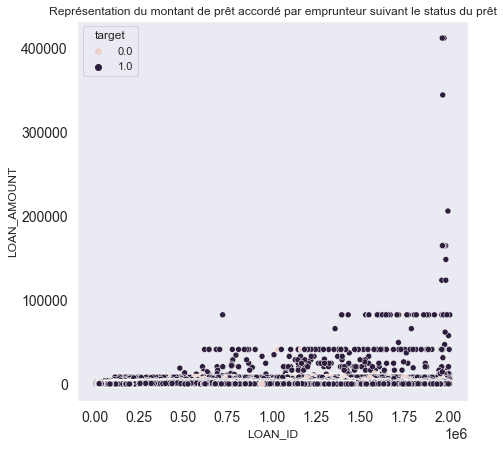

In [211]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=loan_copy.LOAN_ID , y=loan_copy.LOAN_AMOUNT , hue=loan_copy.target)
plt.title('Représentation du montant de prêt accordé par emprunteur suivant le status du prêt')
plt.show()

Ce graphique permet de bien illustré le fait que la variable status du prêt ne discrimine pas le montant des prêts accordé.

In [212]:
# Création des bases de défaut et succès
loan_defaud = loan_copy.loc[loan_copy.target==0]
loan_succes = loan_copy.loc[loan_copy.target==1]
print('Base succès : ', loan_defaud.shape,'\nBase defaut : ',loan_succes.shape)

Base succès :  (90782, 33) 
Base defaut :  (1832362, 33)


In [213]:
# tirage d'un échantillon dans la base de succès
loan_succes = loan_succes.sample(n=loan_defaud.shape[0], replace = False)

In [214]:
# On ajoute la base échantillonnée à la suite de la base de défaut d'où l'utilisation du append
loan_final = loan_defaud.append(loan_succes)

In [216]:
loan_final.reset_index(inplace=True)
print('la dimension de la base de donnée finale est ',loan_final.shape)

la dimension de la base de donnée finale est  (181564, 35)


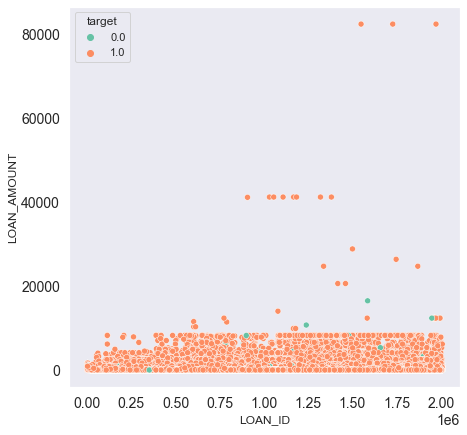

In [217]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=loan_final.LOAN_ID , y=loan_final.LOAN_AMOUNT , hue=loan_copy.target,palette="Set2")
plt.show()

La version actuelle du graphique avec la base équilibré permet de voir clairment que la plupart des montant empruntés et qui n'ont pas été remboursé sont des monatant relativement faibles **( < 20 000€)**. 

## Analyse bi-variée




* Analyse des remboursement par secteurs d'activité

In [112]:
sector_repayment = ['SECTOR_NAME', 'REPAYMENT_INTERVAL']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(loan_final[sector_repayment[0]], loan_final[sector_repayment[1]]).style.background_gradient(cmap = cm)

REPAYMENT_INTERVAL,bullet,irregular,monthly
SECTOR_NAME,,,
Agriculture,13687,6093,27757
Bien_Menage,1016,1033,26233
Food,1242,521,34319
Retail,1653,532,34900
autre_secteur,1578,1202,29808


Ce graphique met en eczergue le fait que les remboursements des prêts dans le secteur agricole sont le moins souvent remboursé à fréquence mensuelles. Ce qui n'est pas le cas pour le remboursement des prêts dans le secteur de la alimentaire et de la vente au détail.

* Status du remboursement suivant la fréquence de remboursement

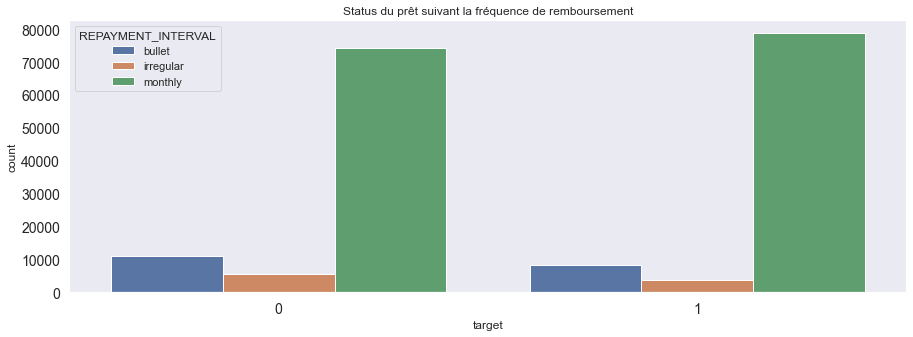

In [114]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x="target", hue='REPAYMENT_INTERVAL', data=loan_final).set_title('Status du prêt suivant la fréquence de remboursement');

Ce graphique permet de constater que la fréquence de remboursement a la même tendance chez les entrepreneure en défaut et chez ceux à succès. En effet, dans ces deux groupes, le remboursement de prêt se fait le plus souvent par mois et le moins souvent à intervalle irrégulier. De cette interprétation, l'on retient que la variable fréquence de remboursement des prêt ne permet pas de faire la distinction à priorie entre un entrepreneur qui  fera defaut et celui qui va rembourser.

* Statut du prêt suivant le sexe de l'emprunteur

In [230]:
pd.crosstab(loan_final['BORROWER_GENDERS'],'freq').apply(lambda r: 100 * r/len(loan_final), axis=1)

col_0,freq
BORROWER_GENDERS,
female,63.238307
male,36.761693


Dans notre nouvelle base de donnée échantillonée, les femmes représentent 63,23% des clients de kiva. Ce chiffre ne d'éloigne pas trop de ce qui était observé sur la base complète.

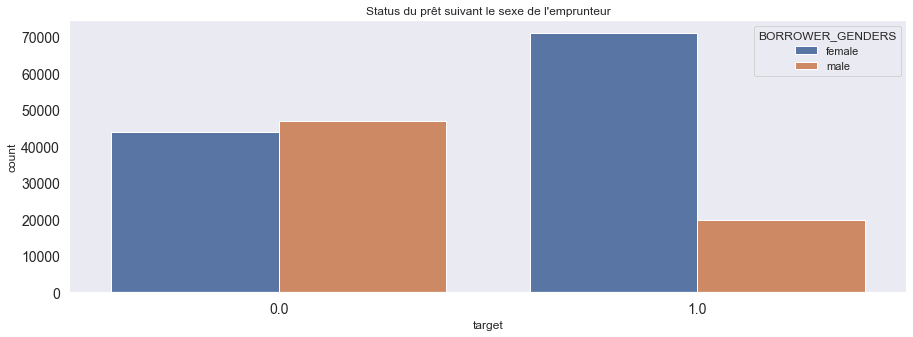

In [226]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x="target", hue='BORROWER_GENDERS', data=loan_final).set_title("Status du prêt suivant le sexe de l'emprunteur");

Le graphique illsutre que les femmes, qui représente prèt de 63% des clients de kiva remboursent le plus souvent leur prêt emprunté relativement aux hommes.

## Analyse multivariée

* Correlation entre les différents facteurs

,FUNDED_AMOUNT,LOAN_AMOUNT,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES
FUNDED_AMOUNT,1.000000,0.791135,0.623441,0.085002,0.073080
LOAN_AMOUNT,0.791135,1.000000,0.432459,0.013584,0.020635
NUM_LENDERS_TOTAL,0.623441,0.432459,1.000000,0.108911,0.099042
NUM_JOURNAL_ENTRIES,0.085002,0.013584,0.108911,1.000000,0.884264
NUM_BULK_ENTRIES,0.073080,0.020635,0.099042,0.884264,1.000000


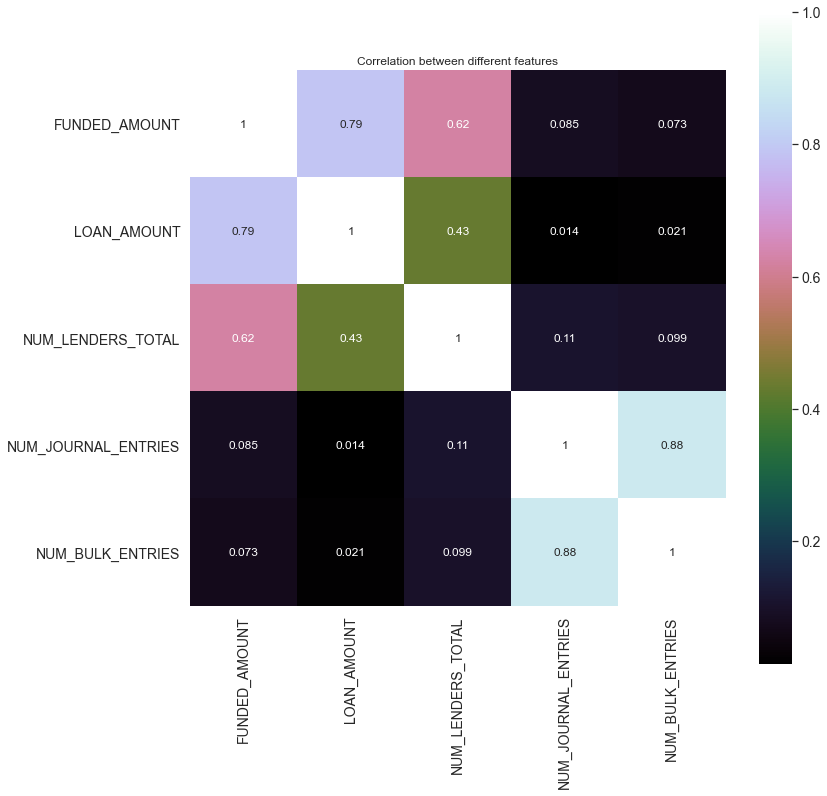

In [243]:
variable = ['FUNDED_AMOUNT','LOAN_AMOUNT','NUM_LENDERS_TOTAL','NUM_JOURNAL_ENTRIES','NUM_BULK_ENTRIES']

corr = loan_final[variable].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap='cubehelix', square=True)
plt.title('Correlation between different features')
corr